In [1]:
import yfinance as yf
import pandas as pd
import datetime

# Define the list of ticker symbols and company names
ticker_symbols = ['AAPL', 'GOOG', 'TSLA']
company_names = ["APPLE", "GOOGLE", "TESLA"]

# Initialize an empty list to store dataframes
company_list = []

# Define the start and end dates
start_date = datetime.datetime.now() - datetime.timedelta(days=2*365)
end_date = datetime.datetime.now()

# Loop through each ticker symbol and download the data
for symbol, name in zip(ticker_symbols, company_names):
    data = yf.download(symbol, start=start_date, end=end_date)
    data['Company'] = name  # Add a column for company name
    company_list.append(data)

# Concatenate all dataframes into a single dataframe
df = pd.concat(company_list, axis=0)

# Print the first few rows of the combined dataframe
df.head()

[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['AAPL']: ConnectTimeout(MaxRetryError("HTTPSConnectionPool(host='query2.finance.yahoo.com', port=443): Max retries exceeded with url: /v8/finance/chart/%ticker%?period1=1648995163&period2=1712067163&interval=1d&includePrePost=False&events=div%2Csplits%2CcapitalGains&crumb=lqVjzN44MM3 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x000001EEAE90D3C0>, 'Connection to query2.finance.yahoo.com timed out. (connect timeout=10)'))"))
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
C:\Users\win10\AppData\Local\Temp\ipykernel_15192\3042798930.py:23: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before t

,Open,High,Low,Close,Adj Close,Volume,Company
Date,,,,,,,
2022-04-04,140.824493,144.043747,140.824493,143.642502,143.642502,19076000.0,GOOGLE
2022-04-05,143.399506,143.589996,140.943497,141.063004,141.063004,19256000.0,GOOGLE
2022-04-06,139.161499,139.848495,136.418106,137.175995,137.175995,23574000.0,GOOGLE
2022-04-07,136.617996,137.701508,134.857254,136.464996,136.464996,19448000.0,GOOGLE
2022-04-08,136.250000,136.250000,133.752502,134.010498,134.010498,16434000.0,GOOGLE


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [3]:
start = '2012-01-01'
end = '2022-12-21'
stock = 'GOOG'

data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [4]:
data.reset_index(inplace=True)

In [5]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-03-27,28.322241,28.322241,27.570307,27.846546,27.846546,262719
1,2014-03-28,27.983171,28.243956,27.857019,27.922838,27.922838,824257
2,2014-03-31,28.266893,28.272379,27.770258,27.772251,27.772251,216593
3,2014-04-01,27.859013,28.344681,27.859013,28.280355,28.280355,158434
4,2014-04-02,29.917362,30.158699,28.032537,28.272379,28.272379,2942055
...,...,...,...,...,...,...,...
2196,2022-12-14,95.540001,97.220001,93.940002,95.309998,95.309998,26452900
2197,2022-12-15,93.540001,94.029999,90.430000,91.199997,91.199997,28298800
2198,2022-12-16,91.199997,91.750000,90.010002,90.860001,90.860001,48485500
2199,2022-12-19,90.879997,91.199997,88.925003,89.150002,89.150002,23020500


In [6]:
ma_100_days = data.Close.rolling(100).mean()

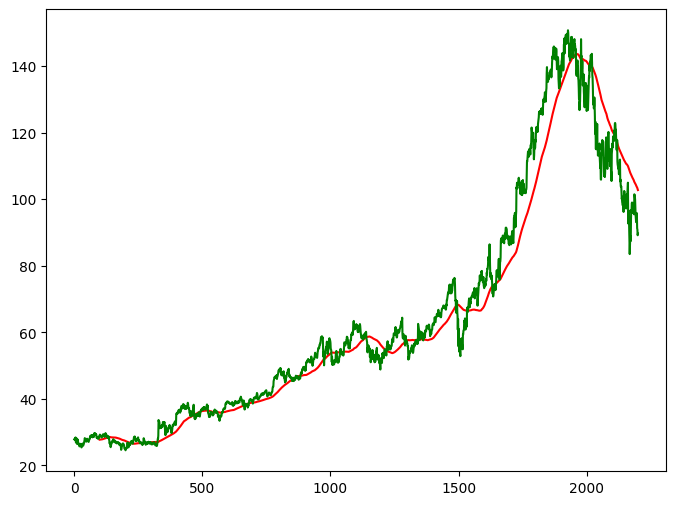

In [7]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [8]:
ma_200_days = data.Close.rolling(200).mean()

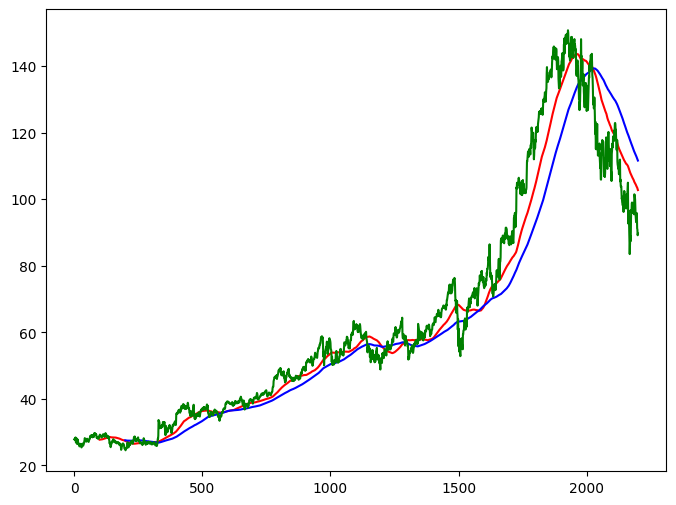

In [9]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [10]:
data.dropna(inplace=True)

In [11]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [12]:
data_train.shape[0]

1760

In [13]:
data_test.shape[0]

441

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [15]:
data_train_scale = scaler.fit_transform(data_train)

In [16]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])
    

In [17]:
x, y = np.array(x), np.array(y)

In [18]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [19]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

C:\Users\win10\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [20]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [21]:
model.fit(x,y, epochs = 50, batch_size =32, verbose =1)

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 25s 298ms/step - loss: 0.0785
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 23s 341ms/step - loss: 0.0062
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 17s 328ms/step - loss: 0.0052
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 19s 294ms/step - loss: 0.0055
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 20s 280ms/step - loss: 0.0045
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 17s 322ms/step - loss: 0.0038
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 19s 367ms/step - loss: 0.0042
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 25s 487ms/step - loss: 0.0043
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 29s 556ms/step - loss: 0.0041
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 35s 436ms/step - loss: 0.0046
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 19s 360ms/step - loss: 0.0035
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 19s 363ms/step - loss: 0.0036
Epoch 13/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 20s 386ms/step - loss: 0.0038
Epoch 14/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 18s 339ms/step - loss: 0.0029
Epoch 15/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 21s 

In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [23]:
pas_100_days = data_train.tail(100)

In [24]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [25]:
data_test_scale  =  scaler.fit_transform(data_test)

In [26]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [27]:
y_predict = model.predict(x)

14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 202ms/step


In [28]:
scale =1/scaler.scale_

In [29]:
y_predict = y_predict*scale

In [30]:
y = y*scale

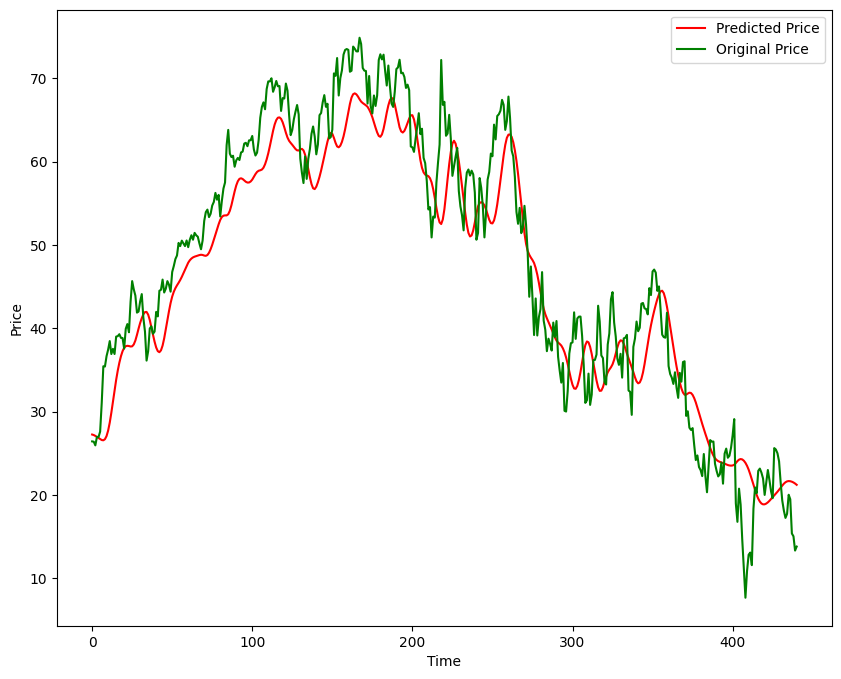

In [31]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

# Sentiment Analysis of Indian News Headlines

Loading Textual Data

In [32]:
import pandas as pd

# Read the CSV file
ndf = pd.read_csv('india-news-headlines.csv', parse_dates=[0], infer_datetime_format=True, usecols=["publish_date", "headline_text"])

# Rename the column
ndf = ndf.rename(columns={"publish_date": "Date"})

# Display the first few rows
ndf.head()

C:\Users\win10\AppData\Local\Temp\ipykernel_15192\410448838.py:4: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  ndf = pd.read_csv('india-news-headlines.csv', parse_dates=[0], infer_datetime_format=True, usecols=["publish_date", "headline_text"])


,Date,headline_text
0,2001-01-02,Status quo will not be disturbed at Ayodhya; s...
1,2001-01-02,Fissures in Hurriyat over Pak visit
2,2001-01-02,America's unwanted heading for India?
3,2001-01-02,For bigwigs; it is destination Goa
4,2001-01-02,Extra buses to clear tourist traffic


In [33]:
ndf.tail()

,Date,headline_text
3650965,2022-03-31,J&K sacks 2 cops; 3 other employees over terro...
3650966,2022-03-31,Ranbir Kapoor says 'Rishi Kapoor enjoyed his a...
3650967,2022-03-31,As Covid-19 cases drop to nil in southern dist...
3650968,2022-03-31,Tamil Nadu sees marginal rise of Covid cases w...
3650969,2022-03-31,Tamil Nadu sees marginal rise of Covid cases w...


In [34]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650970 entries, 0 to 3650969
Data columns (total 2 columns):
 #   Column         Dtype         
---  ------         -----         
 0   Date           datetime64[ns]
 1   headline_text  object        
dtypes: datetime64[ns](1), object(1)
memory usage: 55.7+ MB


In [35]:
start_date = pd.to_datetime('2019-06-30')
end_date = pd.to_datetime('2020-06-30')
ndf=ndf.loc[(ndf['Date'] > start_date) & (ndf['Date'] < end_date)]

In [36]:
ndf=ndf.reset_index()

In [37]:
ndf=ndf.drop("index",axis=1)

In [38]:
ndf.head()

,Date,headline_text
0,2019-07-01,Micro review: 'Tom Clancy: Enemy Contact' by M...
1,2019-07-01,karun nair pops the question will marry girlfr...
2,2019-07-01,karun nair pops the question will marry girlfr...
3,2019-07-01,Bengaluru is running dry; and it is a reality
4,2019-07-01,Cosplayers: Spider-Man is a high-schooler; his...


In [39]:
ndf.tail()

,Date,headline_text
182067,2020-06-29,Can create 22;000 Covid beds with govt help: M...
182068,2020-06-29,Delhi: 25 injured as Tihar Jail inmates try to...
182069,2020-06-29,New SOP issued for better crime control in Delhi
182070,2020-06-29,From Rs 6/kg in May; wholesale tomato price so...
182071,2020-06-29,Nashik city gets moderate rain


In [40]:
# Dropping duplicates by grouping the same dates.
ndf['headline_text'] = ndf.groupby(['Date']).transform(lambda x : ' '.join(x)) 
ndf = ndf.drop_duplicates() 
ndf.reset_index(inplace = True, drop = True)

In [41]:
ndf.head()

,Date,headline_text
0,2019-07-01,Micro review: 'Tom Clancy: Enemy Contact' by M...
1,2019-07-02,Invest in a secure future for your parents Ban...
2,2019-07-03,One actor; six characters: A solo theatre act ...
3,2019-07-04,Party night in Candolim Party night in Candoli...
4,2019-07-05,Telangana CM's school gets swanky building; mo...


Data Pre-Processing

In [42]:
# uppercase-lowercase conversion
ndf['headline_text'] = ndf['headline_text'].apply(lambda x: " ".join(x.lower() for x in x.split()))


In [43]:
# numbers
ndf['headline_text'] = ndf['headline_text'].str.replace('\d','')

In [44]:
#stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\win10\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [45]:
from nltk.corpus import stopwords
sw = stopwords.words('english')
ndf['headline_text'] = ndf['headline_text'].apply(lambda x: " ".join(x for x in x.split() if x not in sw))


In [46]:
## Deletion of sparse.
delete = pd.Series(' '.join(ndf['headline_text']).split()).value_counts()[-1000:]
ndf['headline_text'] = ndf['headline_text'].apply(lambda x: " ".join(x for x in x.split() if x not in delete))

In [47]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\win10\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [48]:
!pip install textblob

In [49]:
#lemmatisation
from textblob import Word

ndf['headline_text'] = ndf['headline_text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()])) 

In [50]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           365 non-null    datetime64[ns]
 1   headline_text  365 non-null    object        
dtypes: datetime64[ns](1), object(1)
memory usage: 5.8+ KB


In [51]:
ndf.head()

,Date,headline_text
0,2019-07-01,micro review: 'tom clancy: enemy contact' mike...
1,2019-07-02,invest secure future parent bank fraud: ed sea...
2,2019-07-03,one actor; six characters: solo theatre act se...
3,2019-07-04,party night candolim party night candolim raja...
4,2019-07-05,telangana cm's school get swanky building; mod...


In [52]:
ndf.tail()

,Date,headline_text
360,2020-06-25,truck firm look new export market sell bs6 ran...
361,2020-06-26,containment zone resident slam high price char...
362,2020-06-27,like wont let toxic relationship food major ra...
363,2020-06-28,atanu ghosh plan rewrite old script make relev...
364,2020-06-29,6 hot stylish bikini look katrina kaif anna ed...


In [53]:
ndf['headline_text'][0:10]

0    micro review: 'tom clancy: enemy contact' mike...
1    invest secure future parent bank fraud: ed sea...
2    one actor; six characters: solo theatre act se...
3    party night candolim party night candolim raja...
4    telangana cm's school get swanky building; mod...
5    music review: super 30 up: boy told sweep scho...
6    world cup point table: semifinal line-up leagu...
7    there's thailand meet eye: here's guide explor...
8    keam 2019 counselling: keam 2nd allotment list...
9    rrb paramedical exam date city detail 2019 rel...
Name: headline_text, dtype: object

In [54]:
ndf[ndf['headline_text'].duplicated(keep=False)].sort_values('headline_text').head(8)

,Date,headline_text


Sentiment Analysis

In [55]:
from textblob import TextBlob

In [56]:
#Functions to get the subjectivity and polarity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return  TextBlob(text).sentiment.polarity

In [57]:
ndf['Subjectivity'] = ndf['headline_text'].apply(getSubjectivity)
ndf['Polarity'] = ndf['headline_text'].apply(getPolarity)
ndf.head()

,Date,headline_text,Subjectivity,Polarity
0,2019-07-01,micro review: 'tom clancy: enemy contact' mike...,0.400548,0.021727
1,2019-07-02,invest secure future parent bank fraud: ed sea...,0.388643,0.026346
2,2019-07-03,one actor; six characters: solo theatre act se...,0.360286,0.009899
3,2019-07-04,party night candolim party night candolim raja...,0.436632,0.069183
4,2019-07-05,telangana cm's school get swanky building; mod...,0.391507,0.025084


<Axes: >

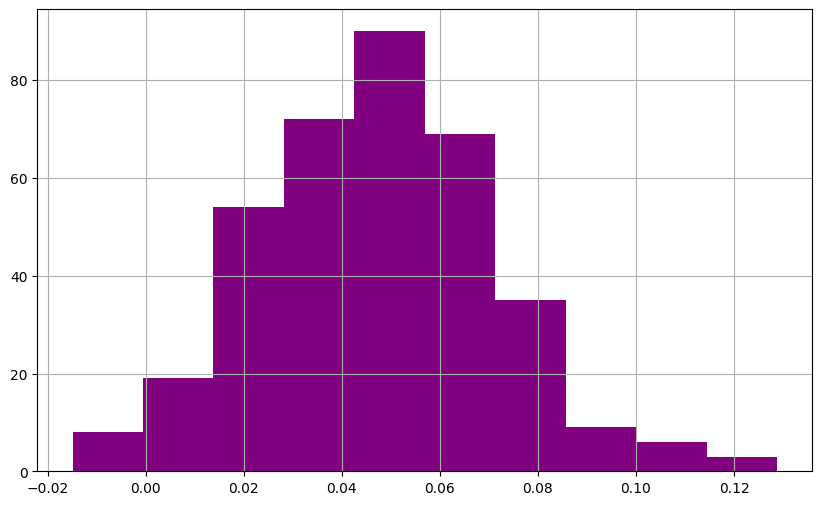

In [58]:
plt.figure(figsize = (10,6))
ndf['Polarity'].hist(color = 'purple')

<Axes: >

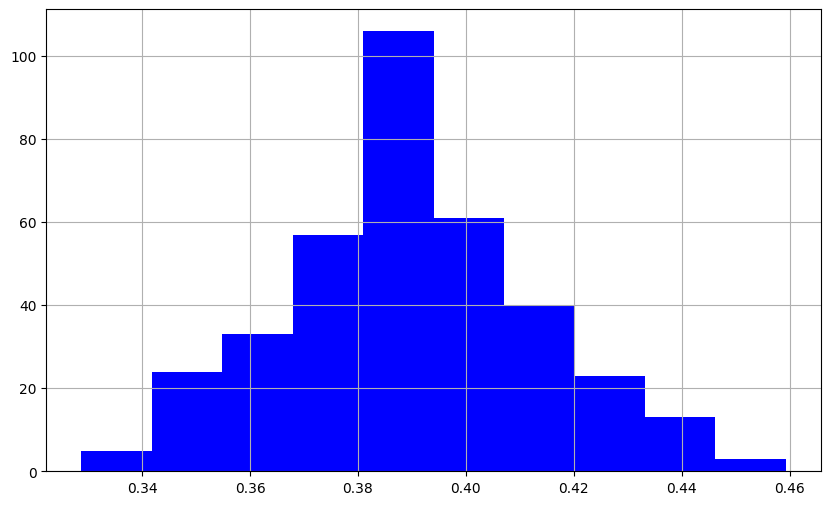

In [59]:
plt.figure(figsize = (10,6))
ndf['Subjectivity'].hist(color = 'blue')

In [60]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\win10\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [61]:
#Adding sentiment score to ndf by using SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

ndf['Compound'] = [sia.polarity_scores(v)['compound'] for v in ndf['headline_text']]
ndf['Negative'] = [sia.polarity_scores(v)['neg'] for v in ndf['headline_text']]
ndf['Neutral'] = [sia.polarity_scores(v)['neu'] for v in ndf['headline_text']]
ndf['Positive'] = [sia.polarity_scores(v)['pos'] for v in ndf['headline_text']]
ndf[0:5]

,Date,headline_text,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,2019-07-01,micro review: 'tom clancy: enemy contact' mike...,0.400548,0.021727,-0.9998,0.159,0.753,0.088
1,2019-07-02,invest secure future parent bank fraud: ed sea...,0.388643,0.026346,-0.9998,0.153,0.748,0.098
2,2019-07-03,one actor; six characters: solo theatre act se...,0.360286,0.009899,-0.9999,0.184,0.715,0.101
3,2019-07-04,party night candolim party night candolim raja...,0.436632,0.069183,-0.9998,0.156,0.741,0.103
4,2019-07-05,telangana cm's school get swanky building; mod...,0.391507,0.025084,-0.9998,0.172,0.722,0.107


In [62]:
df_merge = pd.merge(data, ndf, how='inner', on='Date')
df_merge.head()

,Date,Open,High,Low,Close,Adj Close,Volume,headline_text,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,2019-07-01,54.900002,55.379002,54.685150,54.897499,54.897499,28726000,micro review: 'tom clancy: enemy contact' mike...,0.400548,0.021727,-0.9998,0.159,0.753,0.088
1,2019-07-02,55.112000,55.588501,54.908501,55.562500,55.562500,19832000,invest secure future parent bank fraud: ed sea...,0.388643,0.026346,-0.9998,0.153,0.748,0.098
2,2019-07-03,55.870499,56.338001,55.693001,56.078999,56.078999,15340000,one actor; six characters: solo theatre act se...,0.360286,0.009899,-0.9999,0.184,0.715,0.101
3,2019-07-05,55.889999,56.644001,55.806999,56.579498,56.579498,25286000,telangana cm's school get swanky building; mod...,0.391507,0.025084,-0.9998,0.172,0.722,0.107
4,2019-07-08,56.258499,56.299000,55.560501,55.817501,55.817501,24728000,there's thailand meet eye: here's guide explor...,0.366739,0.055937,-0.9997,0.159,0.738,0.103


In [63]:
df_merge.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,headline_text,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
247,2020-06-23,72.781998,73.797050,72.262001,73.220497,73.220497,28596000,delayed periods? time accept household chore e...,0.343685,0.050515,-0.9999,0.161,0.753,0.086
248,2020-06-24,73.075500,73.771004,71.487503,71.598503,71.598503,35120000,never thought voice today: vidya rajput never ...,0.379522,0.067919,-0.9998,0.147,0.763,0.090
249,2020-06-25,71.495003,72.144997,71.000000,72.066498,72.066498,24610000,truck firm look new export market sell bs6 ran...,0.387249,-0.001952,-0.9999,0.174,0.754,0.072
250,2020-06-26,71.569504,71.672501,67.599503,67.995003,67.995003,85354000,containment zone resident slam high price char...,0.368283,0.049304,-0.9998,0.161,0.741,0.098
251,2020-06-29,67.908997,69.779999,67.350502,69.748497,69.748497,36204000,6 hot stylish bikini look katrina kaif anna ed...,0.370325,0.045778,-0.9998,0.161,0.745,0.094


In [64]:
df_final = df_merge[['Close','Subjectivity', 'Polarity', 'Compound', 'Negative', 'Neutral' ,'Positive']]
df_final

,Close,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,54.897499,0.400548,0.021727,-0.9998,0.159,0.753,0.088
1,55.562500,0.388643,0.026346,-0.9998,0.153,0.748,0.098
2,56.078999,0.360286,0.009899,-0.9999,0.184,0.715,0.101
3,56.579498,0.391507,0.025084,-0.9998,0.172,0.722,0.107
4,55.817501,0.366739,0.055937,-0.9997,0.159,0.738,0.103
...,...,...,...,...,...,...,...
247,73.220497,0.343685,0.050515,-0.9999,0.161,0.753,0.086
248,71.598503,0.379522,0.067919,-0.9998,0.147,0.763,0.090
249,72.066498,0.387249,-0.001952,-0.9999,0.174,0.754,0.072
250,67.995003,0.368283,0.049304,-0.9998,0.161,0.741,0.098


Feature Scaling using MinMaxScaler

In [65]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
df_scaled = pd.DataFrame(sc.fit_transform(df_final))
df_scaled.columns = df_final.columns
df_scaled.index = df_final.index
df_scaled.head()

,Close,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,0.087923,0.549942,0.283714,0.00010,0.50,0.636364,0.256410
1,0.116217,0.458784,0.319447,0.00010,0.44,0.579545,0.384615
2,0.138192,0.241641,0.192212,0.00005,0.75,0.204545,0.423077
3,0.159487,0.480711,0.309688,0.00010,0.63,0.284091,0.500000
4,0.127066,0.291052,0.548371,0.00015,0.50,0.465909,0.448718


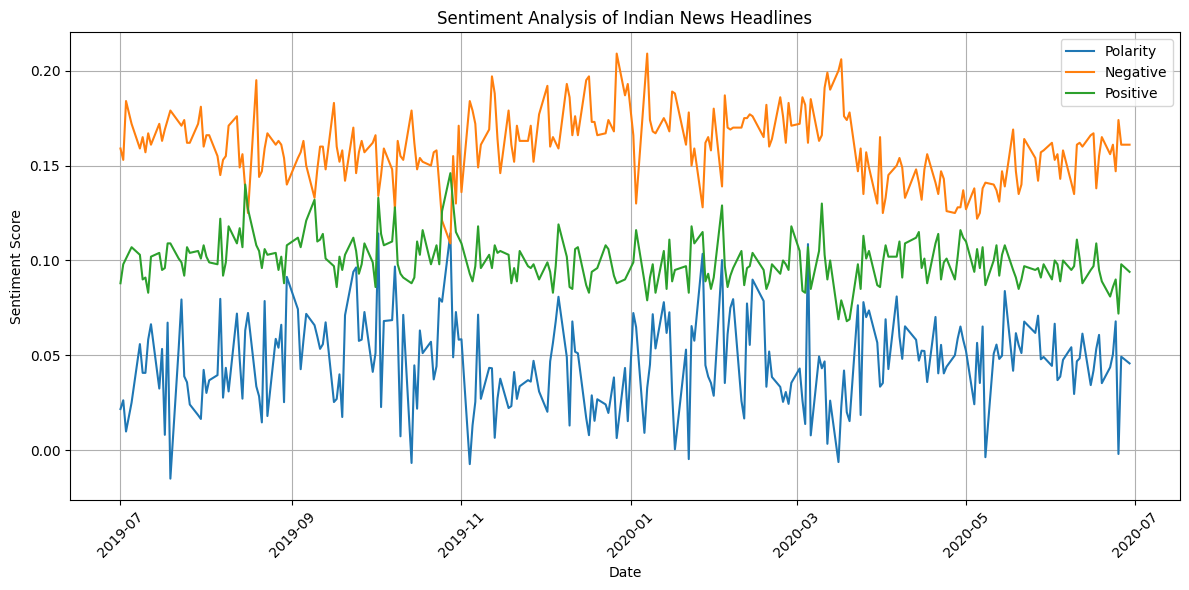

In [66]:
import matplotlib.pyplot as plt

# Plotting sentiment analysis results
plt.figure(figsize=(12, 6))

# Plotting polarity
plt.plot(df_merge['Date'], df_merge['Polarity'], label='Polarity')

# Plotting compound sentiment score
plt.plot(df_merge['Date'], df_merge['Negative'], label='Negative')

# Plotting compound sentiment score
plt.plot(df_merge['Date'], df_merge['Positive'], label='Positive')

# Setting labels and title
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Analysis of Indian News Headlines')
plt.legend()

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Showing grid
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()

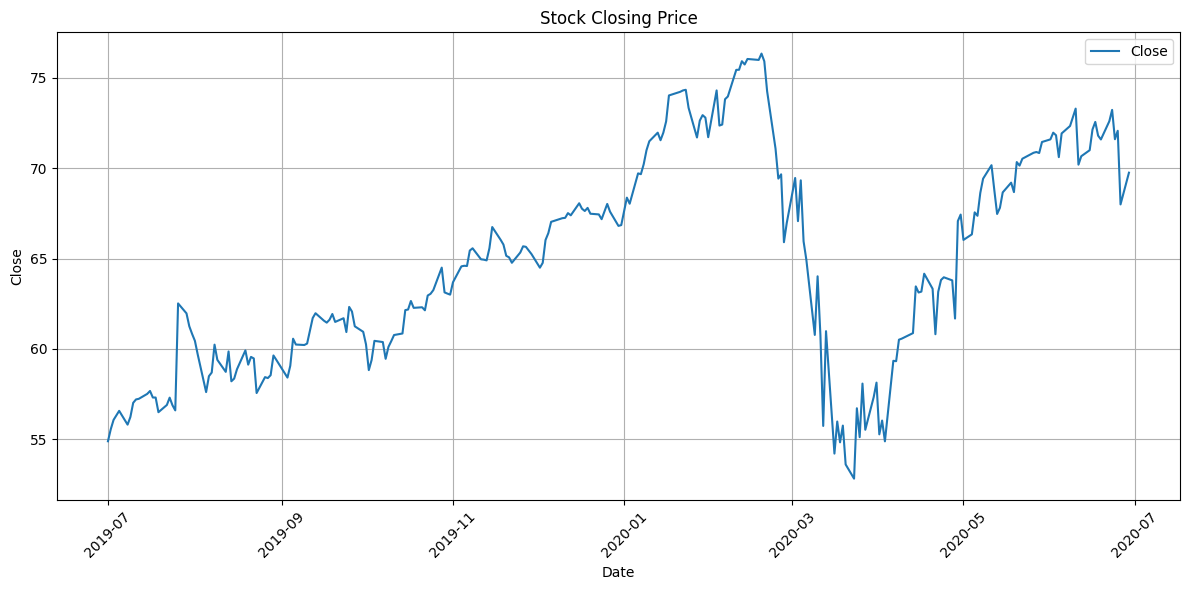

In [67]:
import matplotlib.pyplot as plt

# Plotting sentiment analysis results
plt.figure(figsize=(12, 6))


# Plotting compound sentiment score
plt.plot(df_merge['Date'], df_merge['Close'], label='Close')

# Setting labels and title
plt.xlabel('Date')
plt.ylabel('Close')
plt.title('Stock Closing Price')
plt.legend()

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Showing grid
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()

In [68]:
model.save('Stock Predictions Model.keras')